# Excercises  7843 - Xhefri Bala
# In the following cell, I download the "diabetes" dataset. Exercises are given below:


In [80]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn.linear_model as sk
import matplotlib.pyplot as plt
import numpy as np
import random



# exercises
# diabetes dataset
X, y = load_diabetes(return_X_y=True)

df = pd.DataFrame(X, columns=["age", 
                              "sex", 
                              "bmi", 
                              "avg_blood_pressure", 
                              "s1", 
                              "s2", 
                              "s3", 
                              "s4", 
                              "s5", 
                              "s6",])
target = pd.DataFrame(y, columns=["progression"])

df.head()

,age,sex,bmi,avg_blood_pressure,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


#1 Split your data into a training set and a test set. (1 point)

In [94]:
#split data into a training set and a test set


# X_train, X_test, y_train, y_test = train_test_split(X, y)






#2. Plot a bar chart showing the correlation between features in the training set, and the target values (2 points)

In [89]:
# Put the target (progression) in another DataFrame
#target = pd.DataFrame(y, columns=["progression"])
target.head()

,progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


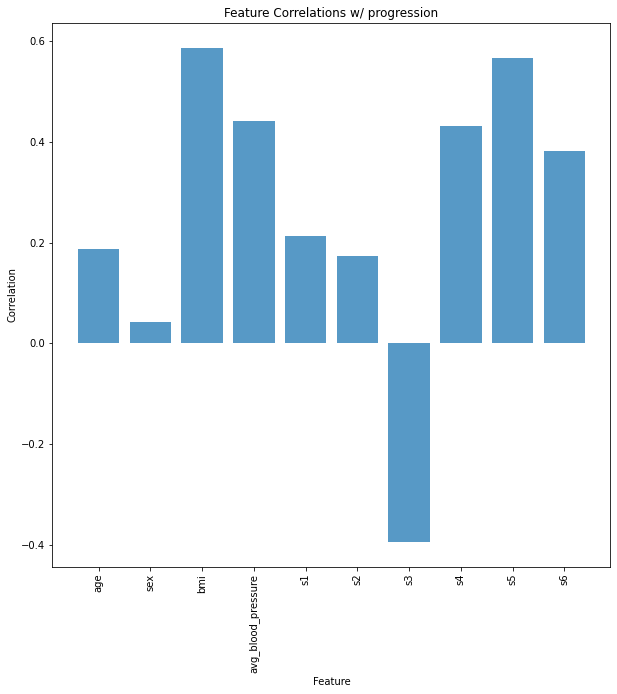

In [88]:
labels = df.columns
temp = df.copy()
temp["progression"] = target
correlations = temp.corr()["progression"]
plt.figure(figsize=(10,10))
plt.bar(labels, correlations[:-1], alpha=0.75)
plt.title("Feature Correlations w/ progression")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.xticks(rotation="vertical")
plt.show()

# 3. Pick two features, and for each one, fit a linear model to the data. Then, plot the line of best fit going through the data (see the above examples). (4 points)

In [95]:
# code for first model goes here

X = df
y = target["progression"]
X_train, X_test, y_train, y_test = train_test_split(X[["bmi"]], y, test_size=0.33, random_state=42)
lm = sk.LinearRegression()
model = lm.fit(X_train, y_train)

In [96]:
# Now that the model is fitted, let's access some parameters
predictions = lm.predict(X_test)
print("Predicted Values")
print(predictions[0:5])
print()

print("Test Set Score")
print(lm.score(X_test, y_test))
print()

print("Beta")
print(lm.coef_)
print()

print("Alpha")
print(lm.intercept_)
print()

Predicted Values
[144.22504943 186.1681612  146.32220502 200.84825032 130.5935381 ]

Test Set Score
0.3164396837685731

Beta
[972.87627375]

Alpha
150.2626749624518



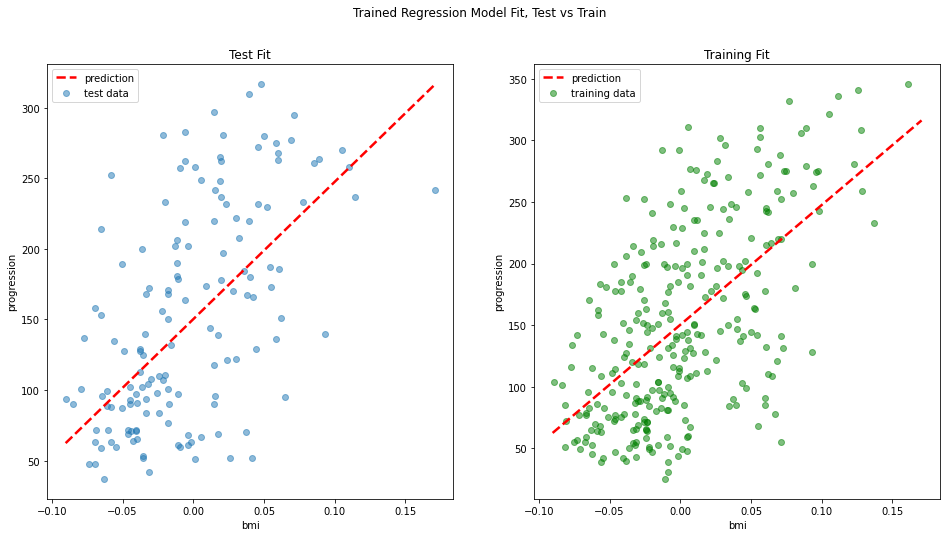

In [98]:
xs = np.linspace(X_test.min(), X_test.max(), 1000)
ys = lm.predict(xs)

fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(xs, ys, "r--", linewidth=2.5)
ax[0].scatter(X_test, y_test, alpha=0.5)
ax[0].set_title("Test Fit")
ax[0].set_xlabel("bmi")
ax[0].set_ylabel("progression")
ax[0].legend(["prediction", "test data"])

ax[1].plot(xs, ys, "r--", linewidth=2.5)
ax[1].scatter(X_train, y_train, c="g", alpha=0.5)
ax[1].set_title("Training Fit")
ax[1].set_xlabel("bmi")
ax[1].set_ylabel("progression")
ax[1].legend(["prediction", "training data"])
plt.suptitle("Trained Regression Model Fit, Test vs Train")

plt.show()

In [106]:
# code for second model goes here
X_train, X_test, y_train, y_test = train_test_split(X[["age"]], y, test_size=0.33, random_state=42)

lm = sk.LinearRegression()
model = lm.fit(X_train, y_train)


predictions = lm.predict(X_test)
print("Predicted Values")
print(predictions[0:5])
print()

print("Test Set Score")
print(lm.score(X_test, y_test))
print()

print("Beta")
print(lm.coef_)
print()

print("Alpha")
print(lm.intercept_)
print()


Predicted Values
[164.92844014 178.77710227 170.25484866 179.84238397 155.34090482]

Test Set Score
0.0453315961729126

Beta
[293.26095691]

Alpha
151.63169998393042



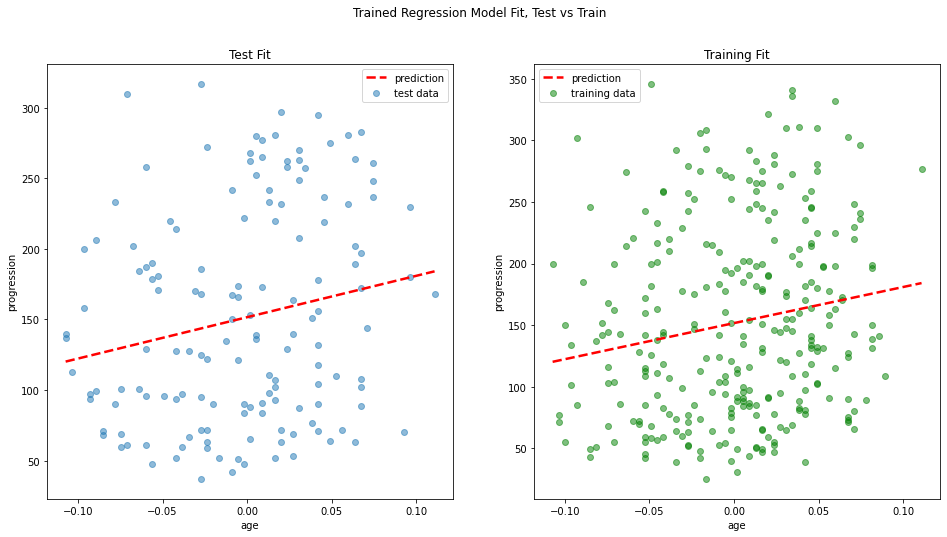

In [107]:
xs = np.linspace(X_test.min(), X_test.max(), 1000)
ys = lm.predict(xs)

fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(xs, ys, "r--", linewidth=2.5)
ax[0].scatter(X_test, y_test, alpha=0.5)
ax[0].set_title("Test Fit")
ax[0].set_xlabel("age")
ax[0].set_ylabel("progression")
ax[0].legend(["prediction", "test data"])

ax[1].plot(xs, ys, "r--", linewidth=2.5)
ax[1].scatter(X_train, y_train, c="g", alpha=0.5)
ax[1].set_title("Training Fit")
ax[1].set_xlabel("age")
ax[1].set_ylabel("progression")
ax[1].legend(["prediction", "training data"])
plt.suptitle("Trained Regression Model Fit, Test vs Train")
plt.show()

#4 fit a multilinear model using the two best features -- how does this estimate compare to the previous models? (3 points)



In [109]:
# code goes here
X_train, X_test, y_train, y_test = train_test_split(X[["bmi", "avg_blood_pressure"]], y, test_size=0.33, random_state=42)

lm = sk.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
print("Predicted Values")
print(predictions[0:5])
print()

print("Test Set Score")
print(lm.score(X_test, y_test))
print()

print("Beta")
print(lm.coef_)
print()

print("Alpha")
print(lm.intercept_)
print()

Predicted Values
[138.29295282 189.23954996 141.4909823  225.6037483  132.68875243]

Test Set Score
0.35456650783056665

Beta
[812.77170575 419.99810454]

Alpha
150.0566199337341



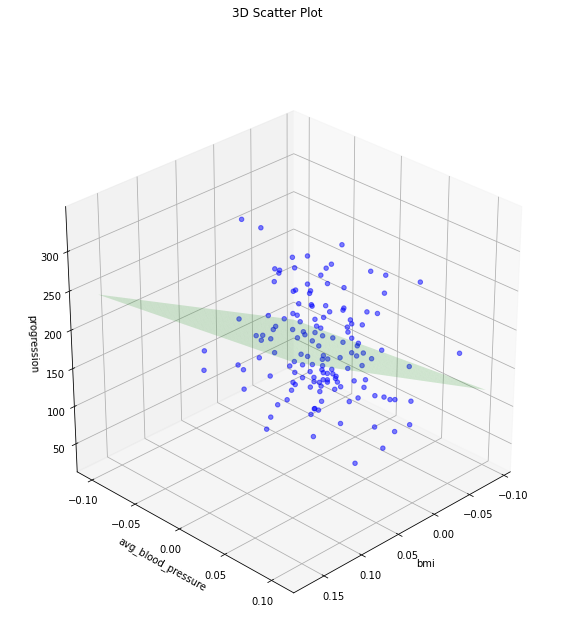

In [114]:
from mpl_toolkits.mplot3d import Axes3D

xs = np.linspace(X_test["bmi"].min(), X_test["bmi"].max(), 1000)
ys = np.linspace(X_test["avg_blood_pressure"].min(), X_test["avg_blood_pressure"].max(), 1000)
X, Y = np.meshgrid(xs, ys)
XY = np.hstack([X.ravel().reshape(-1,1), Y.ravel().reshape(-1,1)])
zs = lm.predict(XY)
Z = zs.reshape(X.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_test["bmi"], X_test["avg_blood_pressure"], y_test, c="blue", marker="o", alpha=0.5)
ax.plot_surface(X, Y, Z, color="C2", alpha=0.2)
plt.suptitle("3D Scatter Plot")
ax.set_xlabel("bmi")
ax.set_ylabel("avg_blood_pressure")
ax.set_zlabel("progression")
ax.view_init(30, 45)
plt.draw()
plt.show()

Here we can see that our model has fit a surface to our two features. This makes sense, because we have a single target and two features.As the number of features increases, it becomes more difficult to visualize what is happening.